In [1]:
import torch
import pathlib
import zipfile
from model_handler import ModelHandler

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
mh = ModelHandler(device)
print(f"Running on: {device}")

Running on: cuda


In [3]:

data_path = pathlib.Path("../data")
if not data_path.exists():
    data_path.mkdir()

maestro_data = pathlib.Path("../data/maestro-v2.0.0")
if not maestro_data.exists():
    torch.hub.download_url_to_file(
        "https://storage.googleapis.com/magentadata/datasets/maestro/v2.0.0/maestro-v2.0.0-midi.zip",
        "../data/maestro-v2.0.0-midi.zip",
    )

    with zipfile.ZipFile("../data/maestro-v2.0.0-midi.zip", "r") as zip_ref:
        zip_ref.extractall("../data")
        pathlib.Path("../data/maestro-v2.0.0-midi.zip").unlink()

In [4]:
mh.midi.load_files("../data/maestro-v2.0.0/**/*.mid*")
print(f"Number of Samples: {len(mh.midi.files)}")

Found 1282 files in ../data/maestro-v2.0.0/**/*.mid*
Number of Samples: 1282


In [5]:
train_notes = mh.get_train_notes("../data/notes.pt", 0, 5)
print("Number of notes parsed:", len(train_notes))

Parsing notes from samples
Loaded 1/5: ../data/maestro-v2.0.0/2017/MIDI-Unprocessed_073_PIANO073_MID--AUDIO-split_07-08-17_Piano-e_2-02_wav--1.midi
Loaded 2/5: ../data/maestro-v2.0.0/2017/MIDI-Unprocessed_058_PIANO058_MID--AUDIO-split_07-07-17_Piano-e_2-02_wav--5.midi
Loaded 3/5: ../data/maestro-v2.0.0/2017/MIDI-Unprocessed_081_PIANO081_MID--AUDIO-split_07-09-17_Piano-e_2_-02_wav--4.midi
Loaded 4/5: ../data/maestro-v2.0.0/2017/MIDI-Unprocessed_045_PIANO045_MID--AUDIO-split_07-06-17_Piano-e_2-01_wav--1.midi
Loaded 5/5: ../data/maestro-v2.0.0/2017/MIDI-Unprocessed_075_PIANO075_MID--AUDIO-split_07-08-17_Piano-e_2-06_wav--3.midi
Number of notes parsed: 24525


In [6]:
epochs = 50
batch_size = 16
learning_rate = 0.0005

data, loader, model, criterion, optimizer = mh.create_model(
    epochs, batch_size, learning_rate
)

Training Model: epochs=50, batch size=16, learning rate=0.0005


In [7]:
mh.train_model()

Epoch 1/50 (6.87s)
  Loss: 3.7037192235487546
Epoch 2/50 (7.12s)
  Loss: 3.138480343075259
Epoch 3/50 (6.47s)
  Loss: 2.8327394559814194
Epoch 4/50 (6.96s)
  Loss: 2.6223703998408907
Epoch 5/50 (6.80s)
  Loss: 2.454541979937171
Epoch 6/50 (5.72s)
  Loss: 2.32057486362731
Epoch 7/50 (5.00s)
  Loss: 2.2085451220501815
Epoch 8/50 (4.81s)
  Loss: 2.116120839849921
Epoch 9/50 (4.48s)
  Loss: 2.0347309282070194
Epoch 10/50 (4.54s)
  Loss: 1.9651652909693809
Epoch 11/50 (4.54s)
  Loss: 1.9009509317562305
Epoch 12/50 (7.00s)
  Loss: 1.844493411758408
Epoch 13/50 (6.66s)
  Loss: 1.7929102166058266
Epoch 14/50 (6.60s)
  Loss: 1.742721815554052
Epoch 15/50 (6.35s)
  Loss: 1.6998185037555682
Epoch 16/50 (6.41s)
  Loss: 1.6591851577522392
Epoch 17/50 (7.16s)
  Loss: 1.6197944573149212
Epoch 18/50 (6.74s)
  Loss: 1.584247995107219
Epoch 19/50 (6.98s)
  Loss: 1.5515390776063753
Epoch 20/50 (5.94s)
  Loss: 1.5217284636021593
Epoch 21/50 (5.01s)
  Loss: 1.4888184705903462
Epoch 22/50 (6.11s)
  Loss: 1.

LSTMModel(
  (lstm): LSTM(3, 128)
  (pitch_fc): Linear(in_features=128, out_features=128, bias=True)
  (step_fc): Linear(in_features=128, out_features=1, bias=True)
  (duration_fc): Linear(in_features=128, out_features=1, bias=True)
)

In [66]:
raw_notes = mh.midi.get_notes(mh.midi.files[10])
num_predictions = 120
seq_length = 30
temperature = 2.0

generated_notes, out_pm = mh.generate_notes(
    raw_notes, num_predictions, seq_length, temperature
)

In [ ]:
mh.midi.display_audio(out_pm)

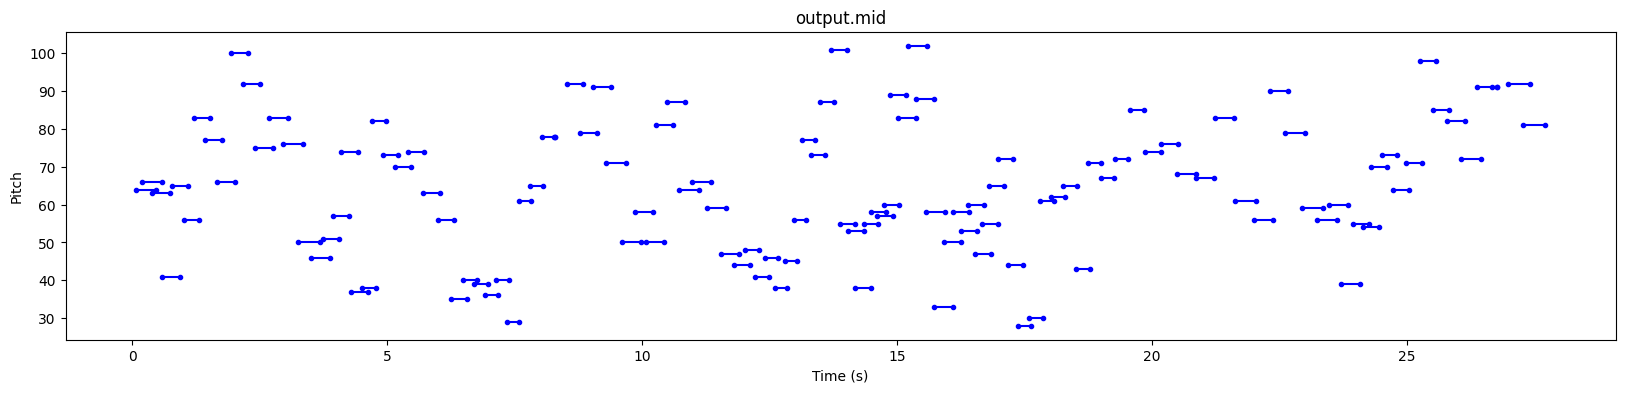

In [67]:
mh.midi.display_midi("output.mid")